In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import scipy.stats as pearsonr

In [2]:
#Versions utilisées 
print("Jupyter Notebook : " + str(pd.__version__))
print("Pandas : " + str(pd.__version__))
print("Numpy : " + str(np.__version__))
print("Seaborn : " + str(sns.__version__))

Jupyter Notebook : 1.2.4
Pandas : 1.2.4
Numpy : 1.20.1
Seaborn : 0.11.1


### Scénario 
Société de consulting informatique (préférant garder l'anonymat), un nouveau contrat au Ministère de l'Intérieur a été remporté. Cette nouvelle mission intervient dans le cadre de la lutte contre la criminalité organisée, à l'Office central pour la répression du faux monnayage. La mission est d'intérêt public, élaborer un algorithme de détection de faux billets. Un seul mot d'ordre : traquer la moindre fraude!

### Lexique
Ce dataframe va contenir les caractéristiques géométriques de billets de banque. Pour chacun d'eux, nous connaissons :

- length : la longueur du billet (en mm) ;
- height_left : la hauteur du billet *(mesurée sur le côté gauche, en mm)** ;
- height_right : la hauteur du billet (mesurée sur le côté droit, en mm) ;
- margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
- margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
- diagonal : la diagonale du billet (en mm) ;
- is_genuine : indication si le billet est vrai (True) ou faux (False).

### Mission 0
Afin d'introduire votre analyse, effectuez une brève description des données (analyses univariées et bivariées)

In [3]:
#Importation du fichier source
data = pd.read_csv(r"C:\Users\elodi\Documents\DATA\Data Analyst\Projets\P6\notes.csv")

#### 1. Information et description du dataset 

In [4]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [6]:
data.describe(include='all')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,NaN,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,NaN,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,NaN,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,NaN,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,NaN,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500


# 
Aucune donnée manquante, il ne semble pas y avoir de données aberrantes. Ecarts type et moyennes semblent cohérents

#### 2. Répartition vrai/faux billets 

In [7]:
effectif = data['is_genuine'].value_counts()
modalite = effectif.index
tab = pd.DataFrame(modalite, columns=['is_genuine'])
tab["n"] = effectif.values
tab["f"] = tab["n"] / len(data) 
tab

,is_genuine,n,f
0,True,100,0.588235
1,False,70,0.411765


##### Visualisation 

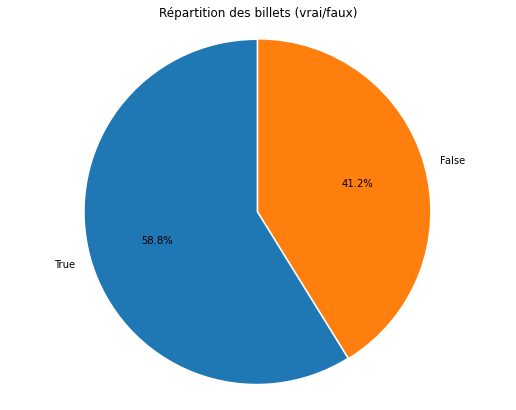

In [8]:
labels = 'True', 'False'
sizes = tab['f']
explode = (0.01, 0)
fig1, ax1 = plt.subplots(figsize=(9,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal') 
plt.title('Répartition des billets (vrai/faux)')
#plt.savefig("Repartition_billets.png")
plt.show()

# 
41.2 % des billets présents dans le dataset sont faux. 

#### 3. Recherche d'éventuels outliers, visualisation par boxplot
    Comparaison selon la nature des billets

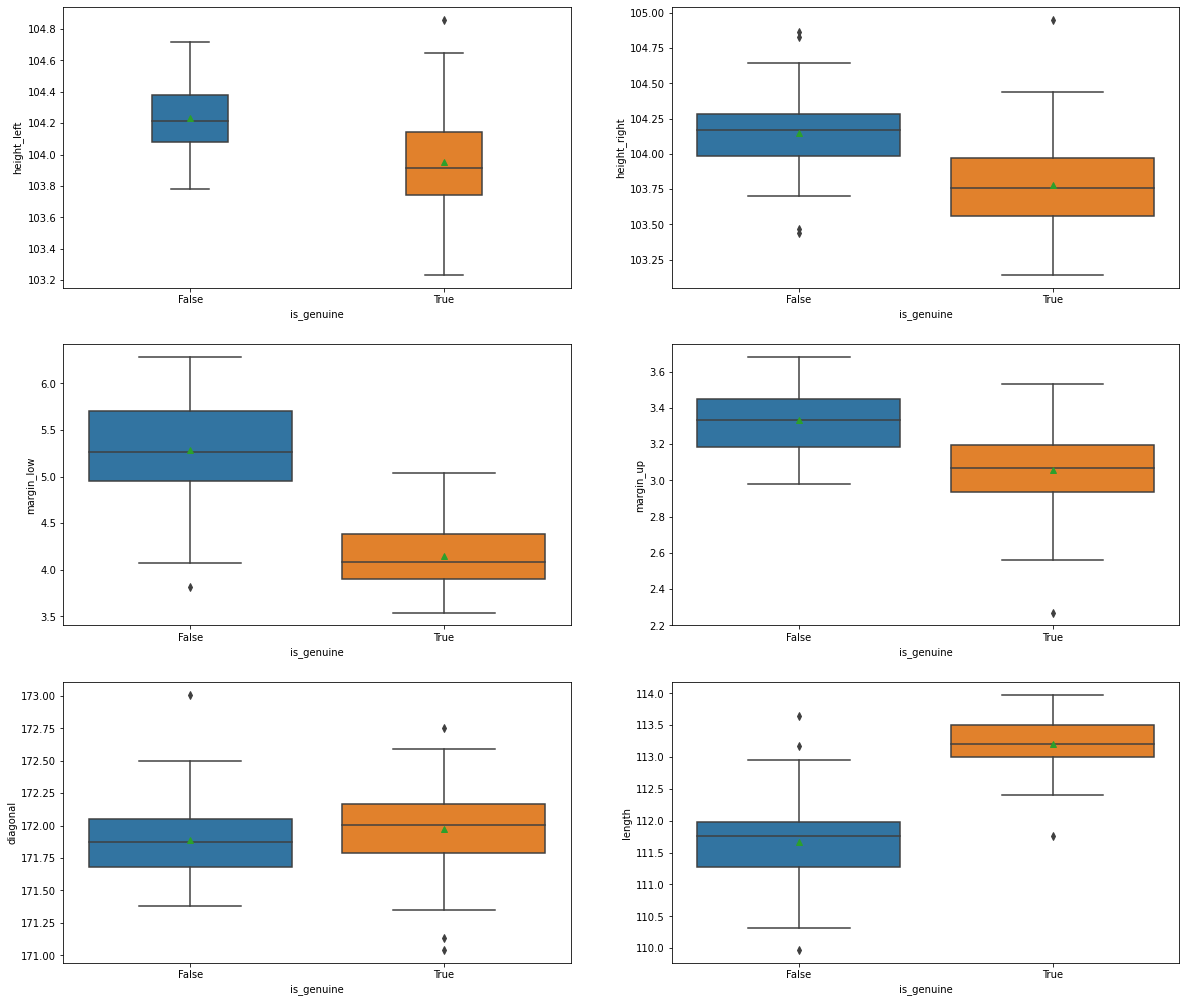

In [9]:
plt.figure(figsize=(20, 30))

plt.subplot(521)
sns.boxplot(x='is_genuine', y='height_left', width=0.3, data=data, showmeans=True)
plt.subplot(522)
sns.boxplot(x='is_genuine', y='height_right', data=data, showmeans=True)
plt.subplot(523)
sns.boxplot(x='is_genuine', y='margin_low', data=data, showmeans=True)
plt.subplot(524)
sns.boxplot(x='is_genuine', y='margin_up', data=data, showmeans=True)
plt.subplot(525)
sns.boxplot(x='is_genuine', y='diagonal', data=data, showmeans=True)
plt.subplot(526)
sns.boxplot(x='is_genuine', y='length', data=data, showmeans=True)

#plt.savefig("outlier.png")
plt.show()

# 
On constate que : 
- Les variables 'height' et 'margin' ont des moyennes et médianes plus élevées pour les faux billets.
- La variable 'length' a une moyenne et médiane beaucoup plus élevée pour les vrais billets.
- La variable 'diagonal' : pas de grande différence. Variable ne semble pas être significative.
- Outliers visibles mais proches des queues de distribution. Outliers conservés pour la suite de l'analyse. 

#### 4. Analyse des corrélations 

##### Matrice des corrélations (pearson)

In [10]:
data.corr(method='pearson')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.139223,-0.461730,-0.551309,-0.800111,-0.582801,0.825743
diagonal,0.139223,1.000000,0.319584,0.220418,-0.181020,-0.027366,0.080295
height_left,-0.461730,0.319584,1.000000,0.734390,0.424530,0.324788,-0.421387
height_right,-0.551309,0.220418,0.734390,1.000000,0.509375,0.366918,-0.417021
margin_low,-0.800111,-0.181020,0.424530,0.509375,1.000000,0.171113,-0.637352
margin_up,-0.582801,-0.027366,0.324788,0.366918,0.171113,1.000000,-0.525284
length,0.825743,0.080295,-0.421387,-0.417021,-0.637352,-0.525284,1.000000


##### Heatmap

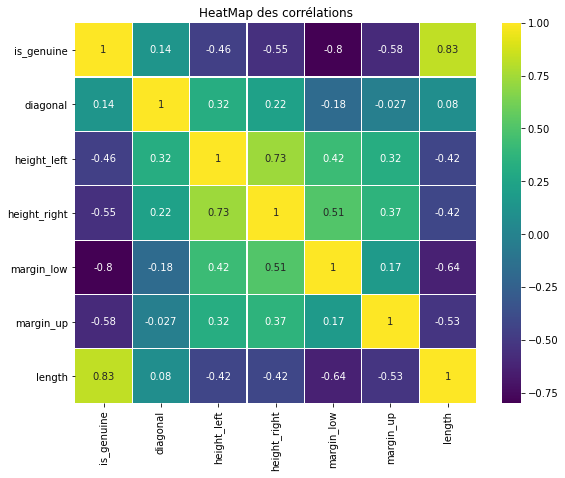

In [11]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap="viridis", linewidths=0.1)
plt.title('HeatMap des corrélations')
#plt.savefig('heatmap_corr.png')
plt.show()

# 
Grâce à la matrice et la heatmap ci-dessus, on constate que plusieurs variables sont fortement corrélées entre elles : 
- height_left / height_right : r = 0.73
- margin_low / height_right : r = 0.51
- margin_low / length : r = -0.64
- margin_up / length : r = -0.53
- les variables lenght et margin_law avec is_genuine (nature du billet) : r=0.83 et r=-0.8.

##### Pairplot sur les variables du dataset

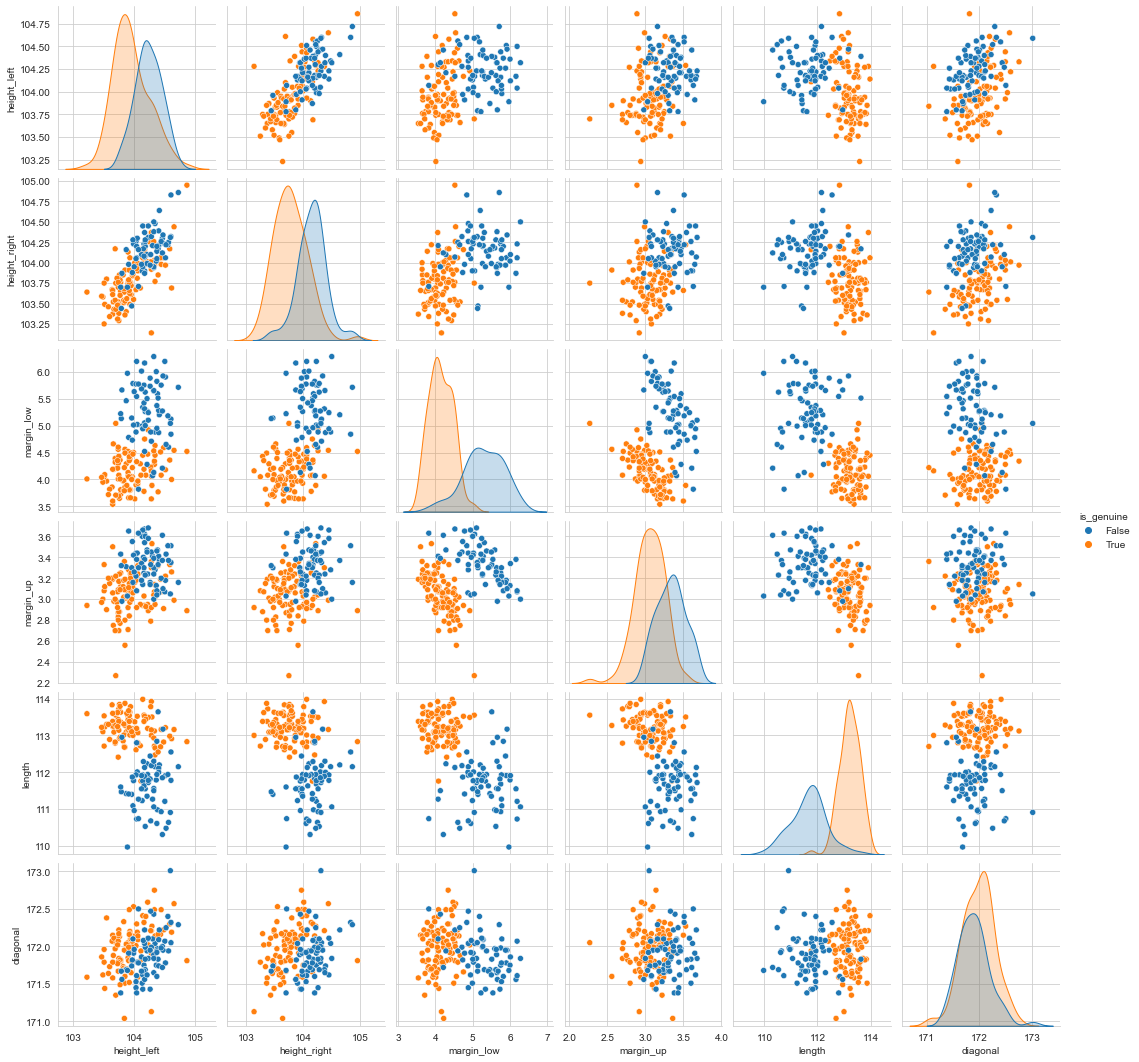

In [12]:
sns.set_style("whitegrid")
sns.pairplot(data[["height_left","height_right","margin_low","margin_up","length","diagonal","is_genuine"]], hue="is_genuine")
#plt.savefig('pairplot.png')
plt.show()

# 
On retrouve nos corrélations. De plus, on observe deux groupes distincts permettant de différencier la nature des billets et d'identifier potentiellement les faux billets.